In [1]:
import h5py
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
file_path = "adabase-public-0001-v_0_0_2.h5py"

In [9]:
SKT_SR = 100
ECG_SR = 500
RSP_SR = 250
EMG_SR = 1000
EDA_SR = 500
EYE_SR = 250

In [5]:
df_signals = pd.read_hdf(file_path, "SIGNALS", mode="r")


In [7]:
# df_signals_ecg = pd.read_hdf(file_path, "SIGNALS", mode="r", columns=["STUDY","LEVEL", "PHASE", 'RAW_ECG_I'])
df_signals_ecg = df_signals[["STUDY","LEVEL", "PHASE", 'RAW_ECG_I']]
df_signals_ecg.shape

(9647884, 4)

In [13]:
study_filter = df_signals["STUDY"] == "n-back"

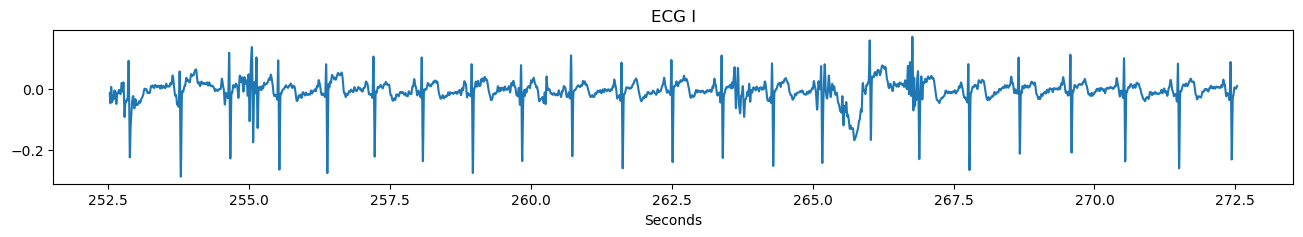

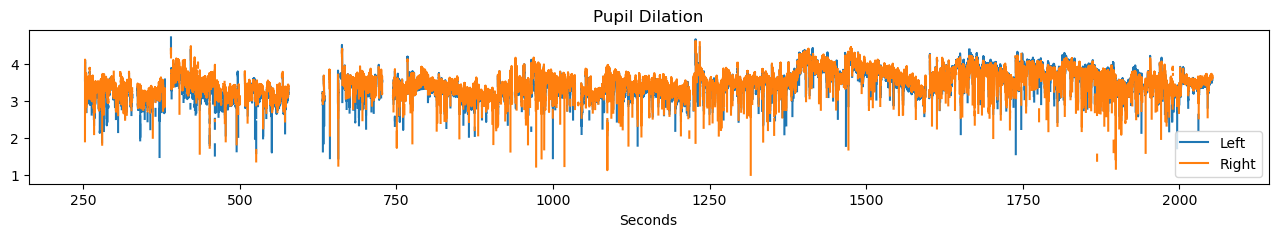

In [16]:
fig, ax = plt.subplots(figsize=(16, 2))
# Set the number of seconds to plot
seconds = 20
# Get the ECG signal data
ecg_signal = df_signals.loc[study_filter, "RAW_ECG_I"].dropna()
# Set the x-axis limits to the number of samples in the specified time range
num_samples = ECG_SR * seconds
# Plot the ECG signal
ax.plot(ecg_signal.index[:num_samples]/1000, ecg_signal[:num_samples]);
ax.set_title("ECG I");
ax.set_xlabel('Seconds');
# Set figure size with a 16:6 aspect ratio
fig, ax = plt.subplots(figsize=(16, 2))
# Set the number of seconds to plot
start_second = 0
end_second = 60*30
# Get the EYE signal data - we replace inf with nan to get the original signal.␣

eye_left_signal = df_signals.loc[study_filter, "LEFT_PUPIL_DIAMETER"].dropna()
eye_right_signal = df_signals.loc[study_filter, "RIGHT_PUPIL_DIAMETER"].dropna()
#eye_left_signal = df_signals.loc[:, "LEFT_PUPIL_DIAMETER"].replace([np.inf],␣

#eye_right_signal = df_signals.loc[:, "RIGHT_PUPIL_DIAMETER"].replace([np.inf],␣

# Set the x-axis limits to the number of samples in the specified time range
num_samples_start = EYE_SR * start_second
num_samples_end = EYE_SR * end_second
ax.plot(eye_left_signal.index[num_samples_start:num_samples_end]/1000,eye_left_signal[num_samples_start:num_samples_end], label="Left")
ax.plot(eye_right_signal.index[num_samples_start:num_samples_end]/1000,eye_right_signal[num_samples_start:num_samples_end], label="Right")
ax.set_title("Pupil Dilation")
ax.set_xlabel('Seconds')
ax.legend()

